Term : Spring 2023
Title: Project 1:A "data story" on the history of philosophy
Name: Haoyang Li

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Background
Philosophy as a discipline aims to form a cognitive and value judgment and abstract generalization about the 
wholeness of the world through human rational thinking, using concepts, judgments, reasoning and other forms of 
thinking logic, presenting a theoretical picture and meaningful understanding of the whole infinity of the world. 
We can analyze the data to see what these major schools of thought are, and also to explore which one has more key
words

Data cleaning
For the cleaning step we need to check is there any NA or duplicate rows in our dataframe cause it will affect our
analysis reult.

In [165]:
df = pd.read_csv('hw1data.csv')
print(len(df))
df = df.drop_duplicates()
print(len(df))
anynull = df.isnull().sum()
print(anynull)

360808
360808
title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
dtype: int64


In [166]:
df.head(3)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...


Next we could analyze the number of each school included in the data. According to the table and graph below, it describes that the peak is analytic which count 55425 data and the bottom one is stoicism which has 2535 data. We can reasonably guess the influence of these schools, the more mainstream schools will have more data.

In [167]:
df_school = df.groupby('school').size().reset_index(name = 'count')
print(df_school)

             school  count
0          analytic  55425
1         aristotle  48779
2        capitalism  18194
3         communism  17958
4       continental  33779
5        empiricism  19931
6          feminism  18635
7   german_idealism  42136
8         nietzsche  13548
9     phenomenology  28573
10            plato  38366
11      rationalism  22949
12         stoicism   2535


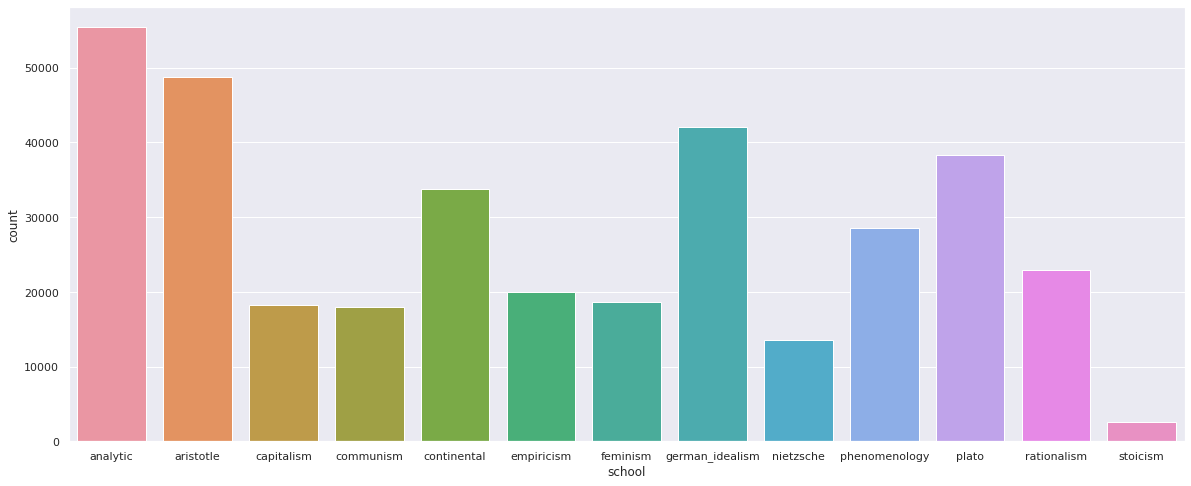

In [168]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data = df_school, x = 'school',y = 'count')

According to the general knowledge, we find that school of Aristotle and school of Plato are two independent individuals which implies there is no other author in our data. Therefore I try to groupby authors to check which person has made the greatest contribution to philosophy. The result below shows that the people are Aristotle and Plato.

In [169]:
df_author = df.groupby('author').size().reset_index(name = 'count')
print(df_author)

             author  count
0         Aristotle  48779
1          Beauvoir  13017
2          Berkeley   2734
3             Davis   3059
4           Deleuze  12540
5           Derrida   5999
6         Descartes   1132
7         Epictetus    323
8            Fichte   5308
9          Foucault  15240
10            Hegel  22700
11        Heidegger  15239
12             Hume   8312
13          Husserl   5742
14             Kant  14128
15           Keynes   3411
16           Kripke  12479
17          Leibniz   5027
18            Lenin   4469
19            Lewis  13120
20            Locke   8885
21      Malebranche  12997
22  Marcus Aurelius   2212
23             Marx  13489
24    Merleau-Ponty   7592
25            Moore   3668
26        Nietzsche  13548
27            Plato  38366
28           Popper   4678
29            Quine   7373
30          Ricardo   3090
31          Russell   5073
32            Smith  11693
33          Spinoza   3793
34     Wittgenstein   9034
35   Wollstonecraft   2559


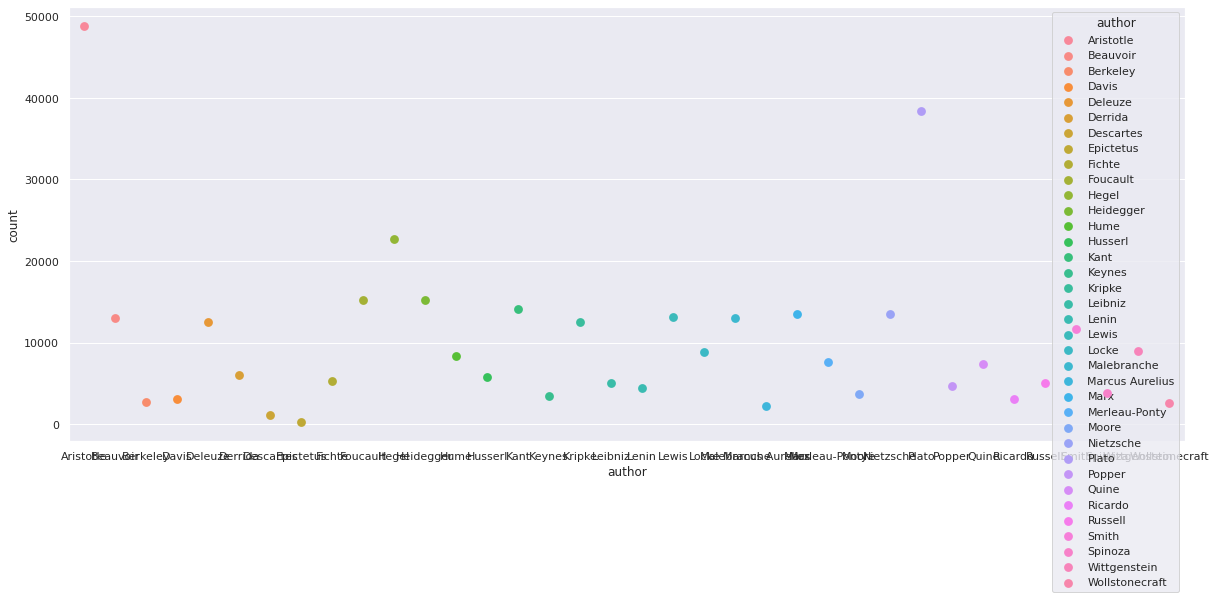

In [170]:
sns.set(rc={'figure.figsize':(20,8)})
sns.pointplot(data = df_author, x = 'author',y = 'count', join=False,hue = 'author')

In [171]:
type(df.sentence_lowered[1])

str

According to the different author, we can use Natural Language Processing to find the most frequently occurring words. Thus we can find another sources about author's main idea in the website and try to compare the accuray of classification.

In [172]:
Aristotle_df = df[df['author'] == 'Aristotle']
Aristotle_df.head(3)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
38366,Aristotle - Complete Works,Aristotle,aristotle,When things have only a name in common and th...,When things have only a name in common and th...,-320,1991,139,when things have only a name in common and th...,"['when', 'things', 'have', 'only', 'name', 'in...",when thing have only a name in common and t...
38367,Aristotle - Complete Works,Aristotle,aristotle,"Thus, for example, both a man and a picture ar...","Thus, for example, both a man and a picture ar...",-320,1991,56,"thus, for example, both a man and a picture ar...","['thus', 'for', 'example', 'both', 'man', 'and...","thus , for example , both a man and a picture..."
38368,Aristotle - Complete Works,Aristotle,aristotle,These have only a name in common and the defin...,These have only a name in common and the defin...,-320,1991,207,these have only a name in common and the defin...,"['these', 'have', 'only', 'name', 'in', 'commo...",these have only a name in common and the defi...


In [173]:
def strAdd(x):
  a = ''
  for i in x:
      a = a + i
  return a


In [174]:
Aristotle_LowSent = Aristotle_df['sentence_lowered']
print(strAdd(Aristotle_LowSent))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [175]:
def getDict(x):
  dic = {}
  words = x.split()
  for i in range(len(words)):
    if words[i] not in dic:
      dic[words[i]] = 1
    else:
      dic[words[i]] += 1
  return dic

In [176]:
dict1 = getDict(strAdd(Aristotle_LowSent))
print(dict1)

{'when': 4859, 'things': 3516, 'have': 6951, 'only': 2466, 'a': 25969, 'name': 323, 'in': 31716, 'common': 578, 'and': 42942, 'the': 97002, 'definition': 379, 'of': 48255, 'being': 3535, 'which': 11824, 'corresponds': 76, 'to': 34655, 'is': 47773, 'different,': 90, 'they': 8860, 'are': 17498, 'called': 1236, 'homonymous.thus,': 1, 'for': 13999, 'example,': 320, 'both': 2415, 'man': 3026, 'picture': 14, 'animals.these': 1, 'different;': 29, 'if': 7592, 'one': 8141, 'say': 1605, 'what': 5420, 'an': 3896, 'animal': 882, 'each': 1738, 'them,': 710, 'will': 5351, 'give': 506, 'two': 2009, 'distinct': 109, 'definitions.when': 1, 'same,': 221, 'synonymous.thus,': 1, 'ox': 20, 'animals.each': 1, 'these': 3909, 'called,': 18, 'by': 8510, 'name,': 52, 'animal,': 213, 'also': 3745, 'same;': 65, 'themone': 1, 'same': 4614, 'definition.when': 2, 'get': 367, 'their': 5155, 'from': 7456, 'something,': 176, 'with': 7006, 'difference': 418, 'ending,': 1, 'paronymous.thus,': 1, 'grammarian': 5, 'gets': 

In [177]:
def topKwords(z,k):
  output = sorted(z.items(),key = lambda x:x[1],reverse = True)
  top_k = output[:k]
  return [i for i, j in top_k]

In [178]:
topwords = topKwords(dict1,150)
topwords

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'a',
 'that',
 'it',
 'are',
 'be',
 'not',
 'for',
 'as',
 'which',
 'or',
 'they',
 'but',
 'by',
 'one',
 'if',
 'this',
 'from',
 'we',
 'with',
 'have',
 'all',
 'what',
 'will',
 'has',
 'their',
 'there',
 'when',
 'at',
 'so',
 'other',
 'same',
 'he',
 'some',
 'must',
 'on',
 'its',
 'these',
 'an',
 'also',
 'more',
 'than',
 'who',
 'no',
 'being',
 'those',
 'things',
 'because',
 'man',
 'do',
 'such',
 'them',
 '.',
 'does',
 'any',
 'should',
 'then',
 'only',
 'can',
 'both',
 'may',
 'been',
 'into',
 'thing',
 'his',
 'either',
 'two',
 'would',
 'case',
 'like',
 'good',
 'while',
 'then,',
 'part',
 'animals',
 'each',
 'something',
 'first',
 'since',
 'say',
 'was',
 'most',
 'time',
 'about',
 'nor',
 'our',
 'others',
 'even',
 'way',
 'many',
 'another',
 'nature',
 'cannot',
 'out',
 'were',
 'eg',
 'reason',
 'motion',
 'body',
 'parts',
 'said',
 'just',
 'always',
 'without',
 'whether',
 'every',
 'called',
 'y

In [179]:
def wordToStr(x):
  a = ''
  for i in x:
    a = a + i + ' '
  return a

In [180]:
newlist = wordToStr(topwords)
print(wordToStr(topwords))

the of is and to in a that it are be not for as which or they but by one if this from we with have all what will has their there when at so other same he some must on its these an also more than who no being those things because man do such them . does any should then only can both may been into thing his either two would case like good while then, part animals each something first since say was most time about nor our others even way many another nature cannot out were eg reason motion body parts said just always without whether every called you men come water sense belong kind though through up make why too belongs possible place certain it, cause neither therefore whole between less after number different contrary true itself nothing movement form air animal us see fact 


In [181]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(newlist)
res = []
for token in doc:
  if token.is_stop == False:
    res.append(token)
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

things thing NOUN NNS attr xxxx True False
man man NOUN NN nsubj xxx True False
. . PUNCT . punct . False False
thing thing NOUN NN pobj xxxx True False
case case VERB VB conj xxxx True False
like like INTJ UH prep xxxx True False
good good ADJ JJ advmod xxxx True False
, , PUNCT , punct , False False
animals animal VERB VBZ advcl xxxx True False
time time NOUN NN attr xxxx True False
way way ADV RB advmod xxx True False
nature nature NOUN NN nsubj xxxx True False
eg eg PROPN NNP compound xx True False
reason reason NOUN NN compound xxxx True False
motion motion NOUN NN compound xxxx True False
body body NOUN NN compound xxxx True False
parts part NOUN NNS nsubj xxxx True False
said say VERB VBD ccomp xxxx True False
called call VERB VBD pcomp xxxx True False
men man NOUN NNS nsubj xxx True False
come come VERB VBP ccomp xxxx True False
water water NOUN NN compound xxxx True False
sense sense NOUN NN nsubj xxxx True False
belong belong VERB VBP ccomp xxxx True False
kind kind ADJ JJ ac

In [182]:
newdict = {}
for token in res:
    if token.text in dict1:
      newdict[token.text] = dict1[token.text]
del newdict['.']
newdict

{'things': 3516,
 'man': 3026,
 'thing': 2214,
 'case': 1980,
 'like': 1902,
 'good': 1895,
 'animals': 1802,
 'time': 1567,
 'way': 1415,
 'nature': 1387,
 'eg': 1358,
 'reason': 1340,
 'motion': 1333,
 'body': 1332,
 'parts': 1320,
 'said': 1309,
 'called': 1236,
 'men': 1166,
 'come': 1145,
 'water': 1142,
 'sense': 1133,
 'belong': 1131,
 'kind': 1127,
 'belongs': 1050,
 'possible': 1033,
 'place': 1031,
 'certain': 985,
 'cause': 973,
 'number': 925,
 'different': 913,
 'contrary': 900,
 'true': 899,
 'movement': 886,
 'form': 885,
 'air': 883,
 'animal': 882,
 'fact': 843}

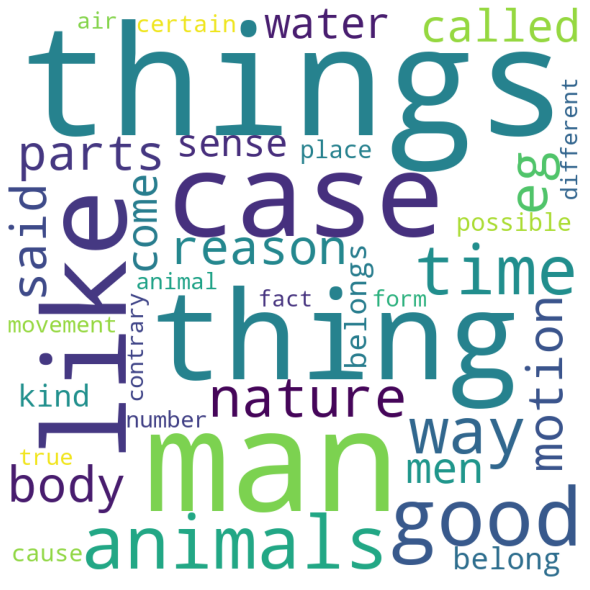

In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate_from_frequencies(newdict)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

According to the reference: 'Aristotle initially claimed that everything was made up of five elements: earth, fire, air, water, and Aether. Aristotle is also famous for his “four causes,” which explain the nature of change in an object.' 
In word cloud above, the larger word implies that word has higher frequency of occurrence. According to the result, nature respresents earth, fire and so on. Furthermore, since most of these words have a strong relevance with real world, such as fact, animals, man. 
So we conclude that his philosophical ideas are closer to real life, which is also the same as the online claims about Aristotle's philosophical ideas, so we think the data is accurate and our analysis is in line with reality

Next, we will select two different authors from the same school to test the accuracy of our analysis.
The authors are Locke and Hume from empircism

In [184]:
Locke_df = df[df['author'] == 'Locke']
Hume_df = df[df['author'] == 'Hume']

In [185]:
Locke_LowSent = Locke_df['sentence_lowered']
print(strAdd(Locke_LowSent))
Hume_LowSent = Hume_df['sentence_lowered']
print(strAdd(Locke_LowSent))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [186]:
dict_Locke = getDict(strAdd(Locke_LowSent))
print(dict_Locke)
dict_Hume = getDict(strAdd(Hume_LowSent))
print(dict_Hume)

{'reader,': 9, 'thou': 17, 'hast': 2, 'here': 134, 'the': 16069, 'beginning': 62, 'and': 10226, 'end': 115, 'of': 14821, 'a': 4898, 'discourse': 58, 'concerning': 153, 'government;': 8, 'what': 1033, 'fate': 3, 'has': 1011, 'otherwise': 50, 'disposed': 7, 'papers': 2, 'that': 6050, 'should': 518, 'have': 2273, 'filled': 18, 'up': 308, 'middle,': 1, 'were': 502, 'more': 856, 'than': 881, 'all': 1618, 'rest,': 34, 'it': 4129, 'is': 4906, 'not': 2730, 'worth': 38, 'while': 30, 'to': 10047, 'tell': 46, 'thee.these,': 1, 'which': 2950, 'remain,': 3, 'i': 1801, 'hope': 27, 'are': 2905, 'sufficient': 59, 'establish': 13, 'throne': 2, 'our': 1662, 'great': 432, 'restorer,': 1, 'present': 156, 'king': 41, 'william;': 1, 'make': 745, 'good': 211, 'his': 1465, 'title,': 7, 'in': 6171, 'consent': 70, 'people,': 83, 'being': 1045, 'only': 665, 'one': 1694, 'lawful': 25, 'governments,': 13, 'he': 1776, 'fully': 12, 'clearly,': 3, 'any': 2114, 'prince': 24, 'christendom;': 1, 'justify': 8, 'world': 1

In [187]:
topwords_Locke = topKwords(dict_Locke,150)
topwords_Locke
topwords_Hume = topKwords(dict_Hume,150)
topwords_Hume

['the',
 'of',
 'and',
 'to',
 'a',
 'is',
 'that',
 'in',
 'which',
 'it',
 'we',
 'be',
 'or',
 'as',
 'from',
 'are',
 'any',
 'by',
 'this',
 'with',
 'not',
 'our',
 'have',
 'an',
 'may',
 'i',
 'but',
 'their',
 'on',
 'all',
 'these',
 'for',
 'they',
 'can',
 'same',
 'more',
 'must',
 'one',
 'no',
 'its',
 'so',
 'us',
 'such',
 'his',
 'than',
 'only',
 'other',
 'when',
 'has',
 'at',
 'will',
 'upon',
 'idea',
 'there',
 'every',
 'without',
 'some',
 'if',
 'what',
 'very',
 'them',
 'he',
 'those',
 'though',
 'never',
 'into',
 'present',
 'would',
 'first',
 'who',
 'object',
 'most',
 'human',
 'nor',
 'my',
 'different',
 'mind',
 'two',
 'being',
 'cause',
 'even',
 'each',
 'relation',
 'natural',
 'therefore,',
 'either',
 'particular',
 'shall',
 'nothing',
 'concerning',
 'ideas',
 'make',
 'objects',
 'you',
 'reason',
 'give',
 'betwixt',
 'nature',
 'certain',
 'new',
 'been',
 'causes',
 'always',
 'where',
 'still',
 'order',
 'were',
 'objects,',
 'much',

In [188]:
newlist_Locke = wordToStr(topwords_Locke)
print(wordToStr(topwords_Locke))
newlist_Hume = wordToStr(topwords_Hume)
print(wordToStr(topwords_Hume))

the of and to in that is a be it or as which are not by we they have any their i he but for one our ideas all from so his with this no those them idea will may being what can other has there if at such than an more on when make same these without who men would only yet some man its into mind made very power use cannot us them, should own ideas, were it, things do though much was had shall simple upon must part great knowledge two think complex every been several different distinct nor names most reason nothing certain how where whether him real know well first another having because far little out name find up words is, general body right about never either parts therefore particular my could under take way mind, makes then hath thing come clear put before thought 
the of and to a is that in which it we be or as from are any by this with not our have an may i but their on all these for they can same more must one no its so us such his than only other when has at will upon idea there ev

In [189]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(newlist_Locke)
res_Locke = []
for token in doc:
  if token.is_stop == False:
    res_Locke.append(token)
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
res_Locke

ideas idea NOUN NNS conj xxxx True False
idea idea NOUN NN nsubj xxxx True False
men man NOUN NNS nsubj xxx True False
man man NOUN NN nsubj xxx True False
mind mind NOUN NN pobj xxxx True False
power power NOUN NN compound xxxx True False
use use NOUN NN dobj xxx True False
, , PUNCT , punct , False False
ideas idea NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
, , PUNCT , punct , False False
things thing NOUN NNS nsubj xxxx True False
shall shall AUX MD aux xxxx True False
simple simple ADJ JJ csubj xxxx True False
great great ADJ JJ amod xxxx True False
knowledge knowledge NOUN NN dobj xxxx True False
think think VERB VBP parataxis xxxx True False
complex complex ADJ JJ ccomp xxxx True False
different different ADJ JJ amod xxxx True False
distinct distinct NOUN NN attr xxxx True False
names name NOUN NNS conj xxxx True False
reason reason VERB VBP dobj xxxx True False
certain certain ADJ JJ amod xxxx True False
real real ADV RB advmod xxxx True False
know know VERB V

[ideas,
 idea,
 men,
 man,
 mind,
 power,
 use,
 ,,
 ideas,
 ,,
 ,,
 things,
 shall,
 simple,
 great,
 knowledge,
 think,
 complex,
 different,
 distinct,
 names,
 reason,
 certain,
 real,
 know,
 having,
 far,
 little,
 find,
 words,
 ,,
 general,
 body,
 right,
 parts,
 particular,
 way,
 mind,
 ,,
 makes,
 hath,
 thing,
 come,
 clear,
 thought]

In [190]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(newlist_Hume)
res_Hume = []
for token in doc:
  if token.is_stop == False:
    res_Hume.append(token)
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
res_Hume

idea idea NOUN NN pobj xxxx True False
present present ADJ JJ pobj xxxx True False
object object VERB VBP ccomp xxxx True False
human human ADJ JJ dobj xxxx True False
different different ADJ JJ amod xxxx True False
mind mind NOUN NN pobj xxxx True False
cause cause VERB VB ccomp xxxx True False
relation relation NOUN NN nsubj xxxx True False
natural natural ADJ JJ ccomp xxxx True False
, , PUNCT , punct , False False
particular particular ADJ JJ amod xxxx True False
shall shall AUX MD aux xxxx True False
concerning concern VERB VBG acl xxxx True False
ideas idea NOUN NNS dobj xxxx True False
objects object NOUN NNS nsubj xxxx True False
reason reason NOUN NN appos xxxx True False
betwixt betwixt PROPN NNP compound xxxx True False
nature nature PROPN NNP dative xxxx True False
certain certain ADJ JJ amod xxxx True False
new new ADJ JJ amod xxx True False
causes cause NOUN NNS ccomp xxxx True False
order order NOUN NN nsubj xxxx True False
objects object NOUN NNS attr xxxx True False
, 

[idea,
 present,
 object,
 human,
 different,
 mind,
 cause,
 relation,
 natural,
 ,,
 particular,
 shall,
 concerning,
 ideas,
 objects,
 reason,
 betwixt,
 nature,
 certain,
 new,
 causes,
 order,
 objects,
 ,,
 great,
 general,
 produce,
 ,,
 common,
 find,
 form,
 ,,
 force,
 ideas,
 ,,
 regard,
 mind,
 ,,
 passions,
 object,
 ,,
 influence,
 entirely,
 men,
 consider,
 contrary,
 impossible,
 case,
 manner,
 derived,
 like,
 ,,
 love,
 passion,
 time,
 naturally]

In [191]:
newdict_Locke = {}
for token in res_Locke:
    if token.text in dict_Locke:
      newdict_Locke[token.text] = dict_Locke[token.text]
newdict_Locke

{'ideas': 1638,
 'idea': 1083,
 'men': 693,
 'man': 633,
 'mind': 586,
 'power': 569,
 'use': 568,
 'things': 496,
 'shall': 464,
 'simple': 464,
 'great': 432,
 'knowledge': 430,
 'think': 410,
 'complex': 408,
 'different': 389,
 'distinct': 374,
 'names': 372,
 'reason': 366,
 'certain': 363,
 'real': 352,
 'know': 344,
 'having': 325,
 'far': 318,
 'little': 314,
 'find': 309,
 'words': 306,
 'general': 302,
 'body': 301,
 'right': 300,
 'parts': 283,
 'particular': 282,
 'way': 270,
 'makes': 265,
 'hath': 255,
 'thing': 255,
 'come': 254,
 'clear': 248,
 'thought': 242}

In [192]:
newdict_Hume = {}
for token in res_Hume:
    if token.text in dict1:
      newdict_Hume[token.text] = dict_Hume[token.text]
newdict_Hume

{'idea': 585,
 'present': 442,
 'object': 381,
 'human': 378,
 'different': 352,
 'mind': 348,
 'cause': 340,
 'relation': 329,
 'natural': 325,
 'particular': 314,
 'shall': 313,
 'concerning': 309,
 'ideas': 307,
 'objects': 303,
 'reason': 297,
 'betwixt': 294,
 'nature': 285,
 'certain': 280,
 'new': 276,
 'causes': 275,
 'order': 249,
 'great': 244,
 'general': 242,
 'produce': 239,
 'common': 234,
 'find': 228,
 'form': 226,
 'force': 222,
 'regard': 219,
 'passions': 214,
 'influence': 210,
 'entirely': 208,
 'men': 205,
 'consider': 199,
 'contrary': 195,
 'impossible': 195,
 'case': 195,
 'manner': 194,
 'derived': 194,
 'like': 188,
 'love': 187,
 'passion': 183,
 'time': 182,
 'naturally': 182}

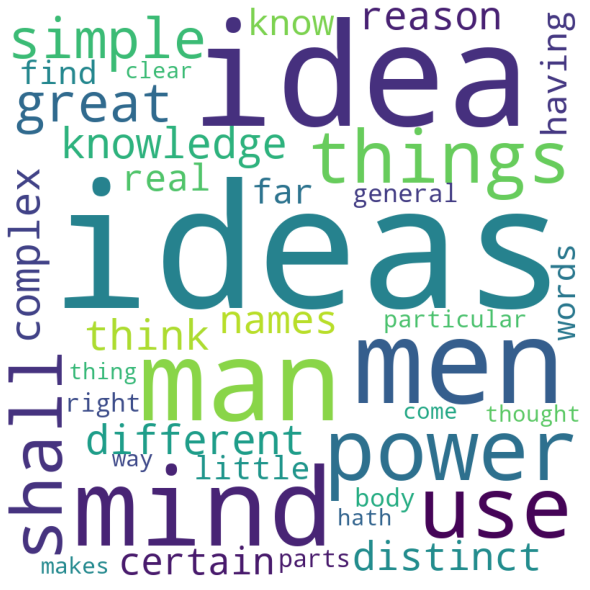

In [193]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate_from_frequencies(newdict_Locke)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

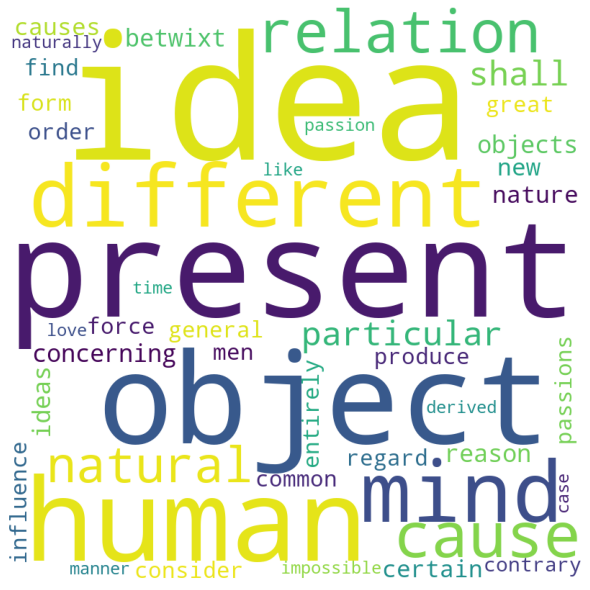

In [194]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate_from_frequencies(newdict_Hume)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Since we get two word cloud from diffent author from same school, it shows that most of their keywords is same such as idea,reason. However, their still has some difference between them.
According to the reference: 'Empiricism advocates that human cognitive activity begins with sensory experience and eventually rises to general principles through induction. Induction is from individual to general, concrete to abstract. But there is an insurmountable gap in this jump from individual to general. The fact that all the swans you have seen up to today are white does not mean that all swans are white.'
According to our analysis, we found that both authors are related to experience, for example, they think about reason and cause, and based on this we can simply assume that according to our generalization, they are indeed representatives of the empirical school

Conclusion:
Throughout the project, we first analyzed which schools had the highest number of data, and then made a guess as to whether this school with the most data represented the most mainstream key in philosophy, which we found to be basically similar according to online sources. We then analyzed each author and found that the ones with the most data were Aristotle and Plato, both of whom were the founders of philosophy. Finally, we conducted an analysis by nlp to try to decipher the core views of each person, and tried to verify our model by simply verifying whether two people came from the same school. After our analysis, we found that there are still some differences in the focus of authors from different schools, they do not focus on the same things